# 서울시 가구원수별 가구수

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 데이터 파악하고 정리하기

In [2]:
df = pd.read_csv('./data/서울시 가구원수별 통계(2019).tsv', sep='\t', header=1)
df.head()

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3
1,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3


In [3]:
del df['기간']
del df['평균가구원수']
df.drop([0], inplace=True)
df.rename({'구분': '구별'}, inplace=True, axis=1)
df.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상
1,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143
2,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102
3,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171
4,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253
5,광진구,"149,905","58,714","35,678","28,054","21,454","4,711","1,006",288


In [4]:
df['일반가구수'] = df['일반가구수'].map(lambda s: int(s.replace(',','')))
df['1인'] = df['1인'].map(lambda s: int(s.replace(',','')))
df['2인'] = df['2인'].map(lambda s: int(s.replace(',','')))
df['3인'] = df['3인'].map(lambda s: int(s.replace(',','')))
df['4인'] = df['4인'].map(lambda s: int(s.replace(',','')))
df['5인'] = df['5인'].map(lambda s: int(s.replace(',','')))
df['6인'] = df['6인'].map(lambda s: int(s.replace(',','')))
df['7인 이상'] = df['7인 이상'].map(lambda s: int(s.replace(',','')))
df.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상
1,종로구,62652,24671,16208,11154,7828,2143,505,143
2,중구,54496,22078,14578,9540,6292,1533,373,102
3,용산구,93177,35148,25164,17439,11736,2907,612,171
4,성동구,122770,41488,32125,25634,18379,4014,877,253
5,광진구,149905,58714,35678,28054,21454,4711,1006,288


In [5]:
df['4인 이상'] = df['4인'] + df['5인'] + df['6인'] + 7*df['7인 이상']
df['평균가구원수'] = (df['1인'] + 2*df['2인'] + 3*df['3인'] + 4*df['4인'] + 5*df['5인'] + 6*df['6인'] + 7*df['7인 이상']) / df['일반가구수']
df.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,4인 이상,평균가구원수
1,종로구,62652,24671,16208,11154,7828,2143,505,143,11477,2.180409
2,중구,54496,22078,14578,9540,6292,1533,373,102,8912,2.121972
3,용산구,93177,35148,25164,17439,11736,2907,612,171,16452,2.190895
4,성동구,122770,41488,32125,25634,18379,4014,877,253,25041,2.307233
5,광진구,149905,58714,35678,28054,21454,4711,1006,288,29187,2.212435


In [6]:
del df['2인']
del df['3인']
del df['4인']
del df['5인']
del df['6인']
del df['7인 이상']
df.head()

,구별,일반가구수,1인,4인 이상,평균가구원수
1,종로구,62652,24671,11477,2.180409
2,중구,54496,22078,8912,2.121972
3,용산구,93177,35148,16452,2.190895
4,성동구,122770,41488,25041,2.307233
5,광진구,149905,58714,29187,2.212435


In [7]:
df['1인 비율'] = df['1인'] / df['일반가구수'] * 100
df['4인이상 비율'] = df['4인 이상'] / df['일반가구수'] * 100
df.tail()

,구별,일반가구수,1인,4인 이상,평균가구원수,1인 비율,4인이상 비율
21,관악구,242154,119863,34039,1.952068,49.498666,14.056757
22,서초구,155377,42667,41095,2.519086,27.460306,26.448573
23,강남구,206524,66073,47982,2.388991,31.992892,23.233135
24,송파구,252212,68861,62942,2.494477,27.302825,24.955989
25,강동구,162976,45188,39892,2.474910,27.726782,24.477224


### 인구 현황 데이터 파악하고 정리하기

In [8]:
pop = pd.read_csv('./data/서울시 인구현황(2020 3분기).tsv', sep='\t', header=2)
del pop['기간']
del pop['세대']
del pop['남자']
del pop['남자.1']
del pop['남자.2']
del pop['여자']
del pop['여자.1']
del pop['여자.2']
del pop['세대당인구']
pop.rename({'자치구': '구별', '계': '인구수', '계.1': '내국인', '계.2': '외국인',
            '65세이상고령자': '고령자'}, inplace=True, axis=1)
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [9]:
pop.drop([0], inplace=True)
pop['인구수'] = pop['인구수'].map(lambda s: int(s.replace(',','')))
pop['내국인'] = pop['내국인'].map(lambda s: int(s.replace(',','')))
pop['외국인'] = pop['외국인'].map(lambda s: int(s.replace(',','')))
pop['고령자'] = pop['고령자'].map(lambda s: int(s.replace(',','')))
pop['외국인비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자비율'] = pop['고령자'] / pop['인구수'] * 100
pop.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


### 가구원수 데이터와 인구 현황 데이터를 합치고 분석하기

In [10]:
df = pd.merge(df, pop, on='구별')
df.head()

,구별,일반가구수,1인,4인 이상,평균가구원수,1인 비율,4인이상 비율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,종로구,62652,24671,11477,2.180409,39.377833,18.318649,159842,149952,9890,28396,6.187360,17.765043
1,중구,54496,22078,8912,2.121972,40.513065,16.353494,135321,125800,9521,24265,7.035863,17.931437
2,용산구,93177,35148,16452,2.190895,37.721755,17.656718,244953,229786,15167,39995,6.191800,16.327622
3,성동구,122770,41488,25041,2.307233,33.793272,20.396677,302695,295591,7104,45372,2.346917,14.989346
4,광진구,149905,58714,29187,2.212435,39.167473,19.470331,361923,348064,13859,50047,3.829268,13.828079


In [11]:
df.set_index('구별', inplace=True)
df.tail()

,일반가구수,1인,4인 이상,평균가구원수,1인 비율,4인이상 비율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
관악구,242154,119863,34039,1.952068,49.498666,14.056757,514555,498574,15981,78206,3.105790,15.198764
서초구,155377,42667,41095,2.519086,27.460306,26.448573,429995,426009,3986,59495,0.926988,13.836207
강남구,206524,66073,47982,2.388991,31.992892,23.233135,544085,539235,4850,73942,0.891405,13.590156
송파구,252212,68861,62942,2.494477,27.302825,24.955989,676673,670331,6342,92149,0.937233,13.617951
강동구,162976,45188,39892,2.474910,27.726782,24.477224,462275,458058,4217,68798,0.912228,14.882483


#### 상관관계 분석

In [12]:
df_ana = df[['1인 비율', '4인이상 비율', '평균가구원수', '인구수', '외국인비율', '고령자비율']]
df_corr = df_ana.corr()
df_corr

,1인 비율,4인이상 비율,평균가구원수,인구수,외국인비율,고령자비율
1인 비율,1.000000,-0.951408,-0.988889,-0.414238,0.590722,0.108239
4인이상 비율,-0.951408,1.000000,0.986330,0.514076,-0.617919,-0.308593
평균가구원수,-0.988889,0.986330,1.000000,0.469856,-0.611911,-0.208918
인구수,-0.414238,0.514076,0.469856,1.000000,-0.617271,-0.544650
외국인비율,0.590722,-0.617919,-0.611911,-0.617271,1.000000,0.139582
고령자비율,0.108239,-0.308593,-0.208918,-0.544650,0.139582,1.000000


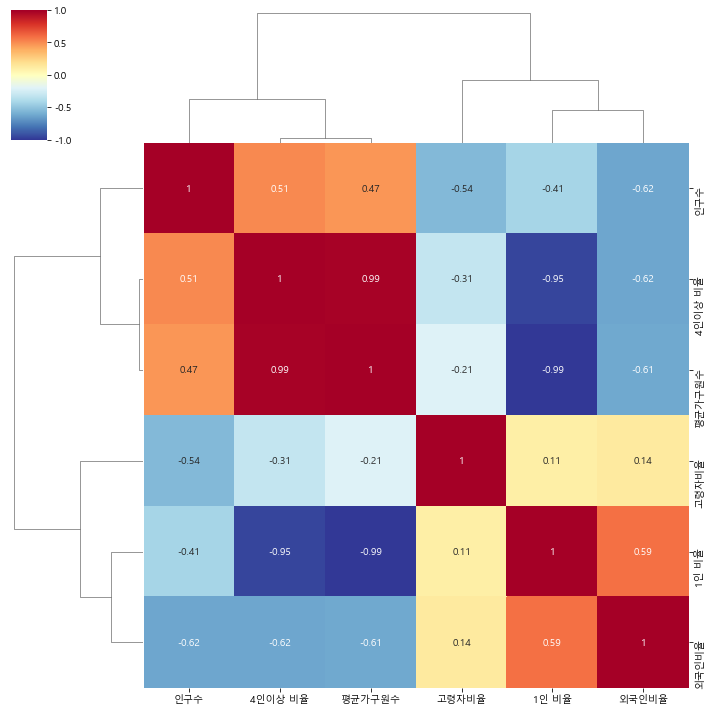

In [13]:
sns.clustermap(df_corr, 
               annot = True,        # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',   # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)

### 그래프 분석

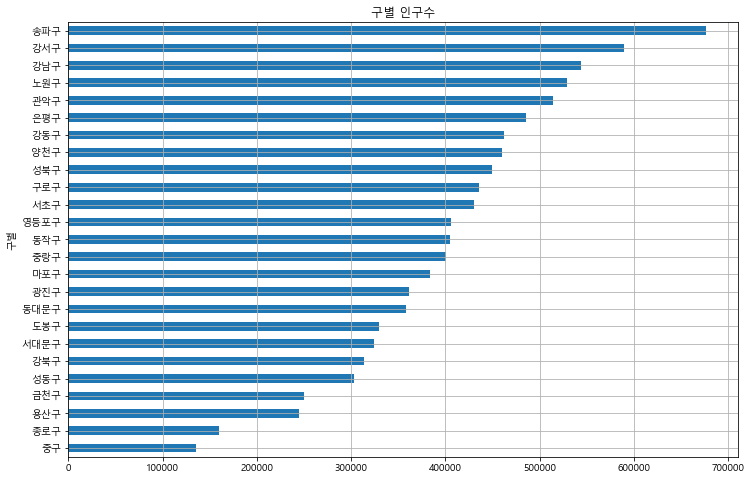

In [14]:
df['인구수'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별 인구수')
plt.show()

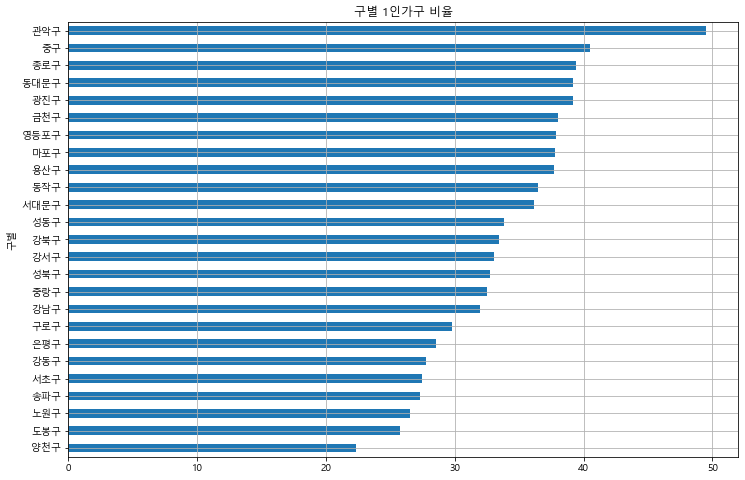

In [15]:
df['1인 비율'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 1인가구 비율')
plt.show()

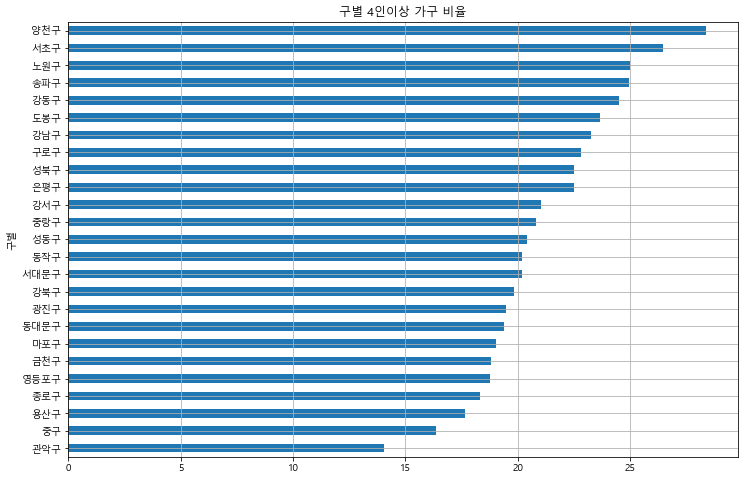

In [16]:
df['4인이상 비율'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 4인이상 가구 비율')
plt.show()

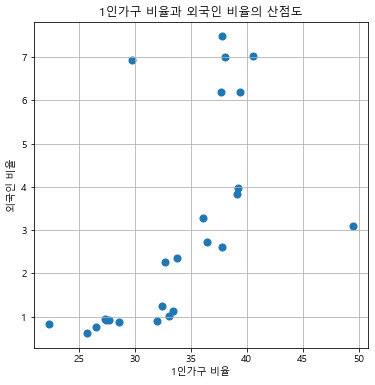

In [17]:
# 1인 가구 비율과 외국인 비율의 산점도
plt.figure(figsize=(6,6))
plt.scatter(df['1인 비율'], df['외국인비율'], s=50)
plt.grid(True)
plt.title('1인가구 비율과 외국인 비율의 산점도')
plt.xlabel('1인가구 비율')
plt.ylabel('외국인 비율')
plt.show()

In [18]:
# 산점도 위에 상관관계를 나타내는 선 그리기
fp1 = np.polyfit(df['1인 비율'], df['외국인비율'], 1)
fp1

array([ 0.23480781, -4.92658962])

In [19]:
fx = np.array([20, 50])
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([-0.23043343,  6.81380087])

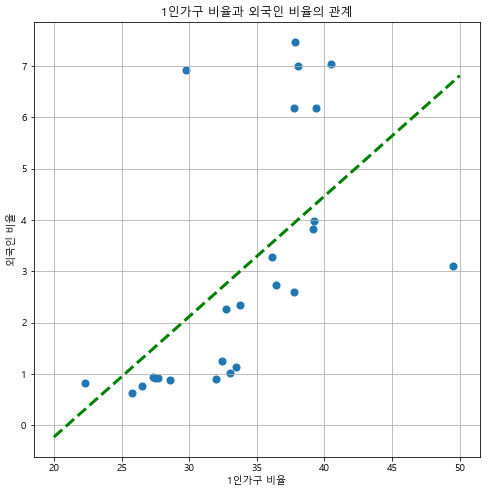

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(df['1인 비율'], df['외국인비율'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('1인가구 비율과 외국인 비율의 관계')
plt.xlabel('1인가구 비율')
plt.ylabel('외국인 비율')
plt.show()

In [21]:
df['오차'] = np.abs(df['외국인비율'] - f1(df['1인 비율']))
df_sort = df.sort_values('오차', ascending=False)
df_sort.head()

,일반가구수,1인,4인 이상,평균가구원수,1인 비율,4인이상 비율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,,,,,
구로구,160378,47740,36594,2.407712,29.767175,22.817344,435751,405579,30172,69312,6.924138,15.906332,4.861162
관악구,242154,119863,34039,1.952068,49.498666,14.056757,514555,498574,15981,78206,3.105790,15.198764,3.590293
영등포구,153923,58214,28847,2.218271,37.820209,18.741189,405982,375630,30352,60826,7.476194,14.982438,3.522303
금천구,99315,37778,18669,2.213593,38.038564,18.797765,249641,232157,17484,39361,7.003657,15.767041,2.998495
중구,54496,22078,8912,2.121972,40.513065,16.353494,135321,125800,9521,24265,7.035863,17.931437,2.449668


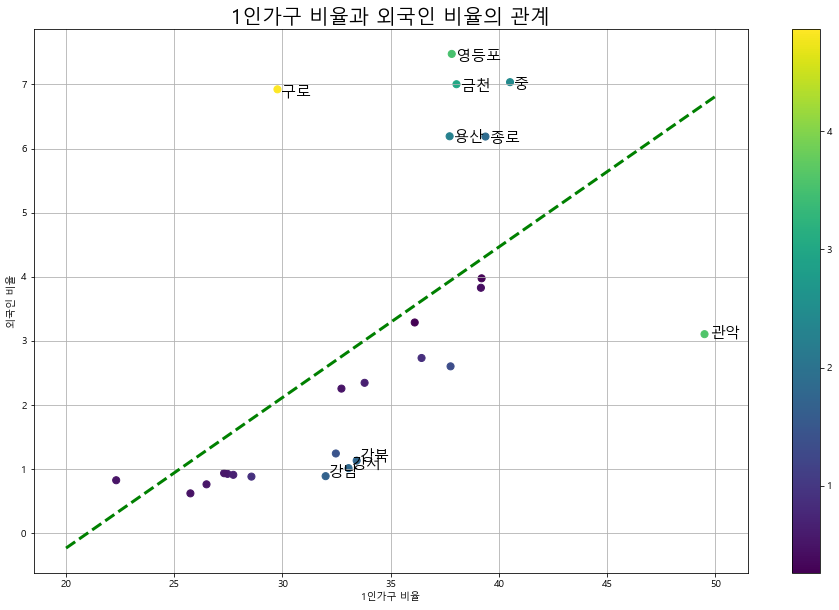

In [22]:
plt.figure(figsize=(16,10))
plt.scatter(df['1인 비율'], df['외국인비율'], c=df['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(df_sort['1인 비율'][i]*1.005, df_sort['외국인비율'][i]*0.985,
             df_sort.index[i][:-1], fontsize=15)

plt.grid(True)
plt.title('1인가구 비율과 외국인 비율의 관계', fontsize=20)
plt.xlabel('1인가구 비율')
plt.ylabel('외국인 비율')
plt.colorbar()
plt.show()

In [24]:
df.to_csv('./results/02.member.csv')